In [1]:
%matplotlib inline
%config InlineBackend.figure.format = 'retina'

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster", font_scale=1.3)
import folium


import pandas as pd
import numpy as np

import os, sys
import warnings
warnings.filterwarnings('ignore')

import pivottablejs
import missingno as msno
import pandas_profiling

import ipywidgets as widgets

In [2]:
mpl_update = {'font.size':14,
              'xtick.labelsize':12,
              'ytick.labelsize':12,
              'figure.figsize':[12.0,8.0],
              'axes.color_cycle':['#0055A7', '#2C3E4F', '#26C5ED', '#00cc66', '#D34100', '#FF9700','#091D32'], 
              'axes.labelsize':16,
              'axes.labelcolor':'#677385',
              'axes.titlesize':20,
              'lines.color':'#0055A7',
              'lines.linewidth':3,
              'text.color':'#677385'}
mpl.rcParams.update(mpl_update)

In [3]:
dfParis = pd.read_pickle('airbnb_paris/airbnb_Paris_updt_0606.p')

In [4]:
dfParis.head()

,accommodates,amenities,availability_30,availability_60,availability_90,bathrooms,bedrooms,beds,cancellation_policy,guests_included,...,Le Marais,Musee d'Orsay,Sainte-Chapelle,Palais Garnier - Opera,Notre Dame Cathedral,Musee de l'Orangerie,Pont Alexandre III,closest_attraction,attraction_dist,close_to_attraction
0,4,"TV,Internet,Wireless Internet,Kitchen,Elevator...",0,0,0,1,1.0,2.0,moderate,1,...,2.614807,1.150961,1.987516,1.378095,2.210333,0.973630,0.559959,Eiffel Tower,0.308310,1.0
1,4,"TV,Wireless Internet,Kitchen,Heating,Family/ki...",8,13,32,1,1.0,1.0,strict,1,...,2.764138,1.300227,2.136825,1.527354,2.359656,1.122883,0.709194,Eiffel Tower,0.159104,1.0
2,4,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",9,21,31,1,1.0,1.0,strict,2,...,1.362370,0.101444,0.735045,0.125839,0.957830,0.278726,0.692391,Musee d'Orsay,0.101444,1.0
3,2,"TV,Internet,Wireless Internet,Kitchen,Indoor f...",0,0,0,1,1.0,1.0,moderate,1,...,2.044433,0.580471,1.417071,0.807693,1.639893,0.403146,0.010559,Pont Alexandre III,0.010559,1.0
4,4,"TV,Wireless Internet,Kitchen,Elevator in build...",10,22,29,1,1.0,1.0,strict,1,...,2.442897,0.979093,1.815618,1.206242,2.038425,0.801773,0.388113,Pont Alexandre III,0.388113,1.0


## Exploring distribution of price for Airbnb rental properties in Paris

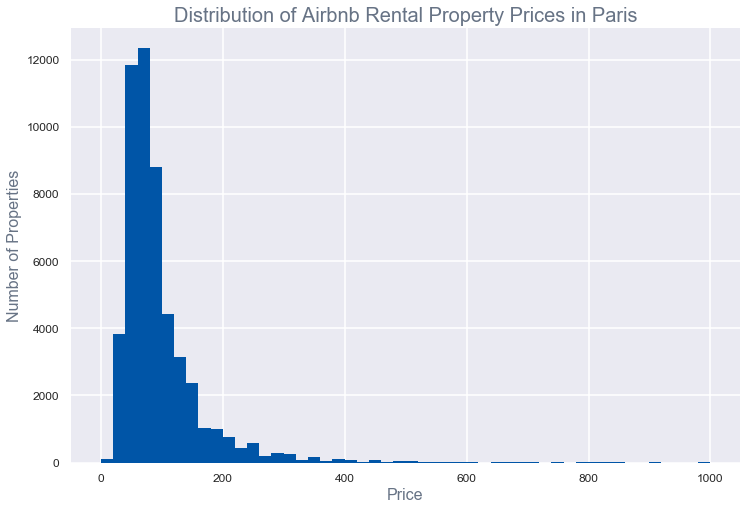

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(dfParis.price,bins=50)
ax.set_xlabel('Price')
ax.set_ylabel('Number of Properties')
ax.set_title('Distribution of Airbnb Rental Property Prices in Paris')

plt.savefig('images/airbnb_price_dist.png', bbox_inches='tight')
plt.show()

#### Explore prices by location

In [6]:
dfParis['price'].describe()

count    52295.000000
mean        93.718673
std         71.128178
min          0.000000
25%         55.000000
50%         75.000000
75%        105.000000
max        999.000000
Name: price, dtype: float64

In [8]:
byArr = dfParis.sort_values(by='arrondissement')
xlabels = byArr[['arrondissement','arrond_name']].sort_values(by='arrondissement').drop_duplicates()
xlabels_text = []
for i, name in xlabels.iterrows():
    txt = str(name['arrondissement']) + '-' + name['arrond_name']
    xlabels_text.append(txt)

In [9]:
xlabels_text

['1-Louvre',
 '2-Bourse',
 '3-Temple',
 '4-Hotel-de-Ville',
 '5-Pantheon',
 '6-Luxembourg',
 '7-Palais-Bourbon',
 '8-Elysee',
 '9-Opera',
 '10-Entrepot',
 '11-Popincourt',
 '12-Reuilly',
 '13-Gobelins',
 '14-Observaitoire',
 '15-Vaugirard',
 '16-Passy',
 '17-Batignolles-Monceau',
 '18-Butte-Montmartre',
 '19-Buttes-Chaumont',
 '20-Menilmontant']

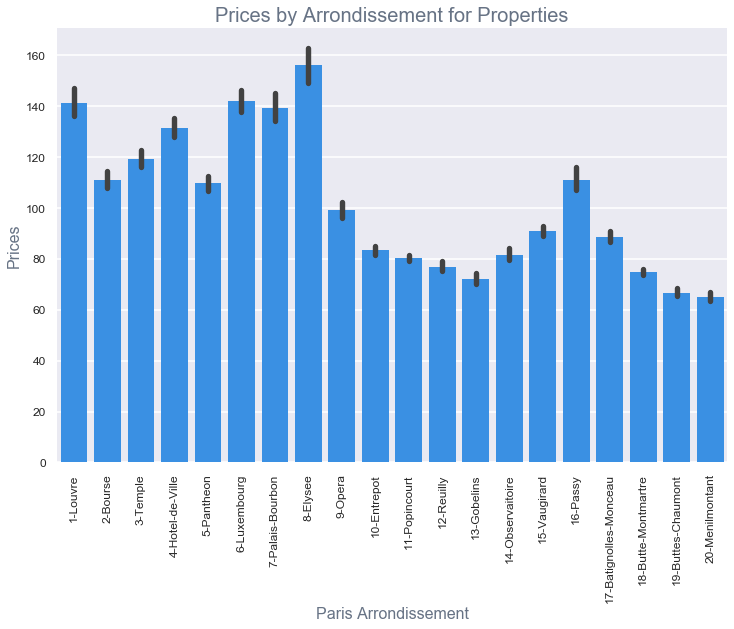

In [10]:
byArr = dfParis.sort_values(by='arrondissement')
fig = plt.figure(figsize=(8,4))
bar, ax = plt.subplots() 
ax = sns.barplot( x='arrondissement', y='price', data=byArr, color='dodgerblue') 
ax.set_title('Prices by Arrondissement for Properties') 
ax.set_xlabel('Paris Arrondissement') 
ax.set_ylabel('Prices') 
ax.set_xticklabels(labels=xlabels_text, rotation=90) 
plt.savefig('images/airbnb_price_byArr.png', bbox_inches='tight')

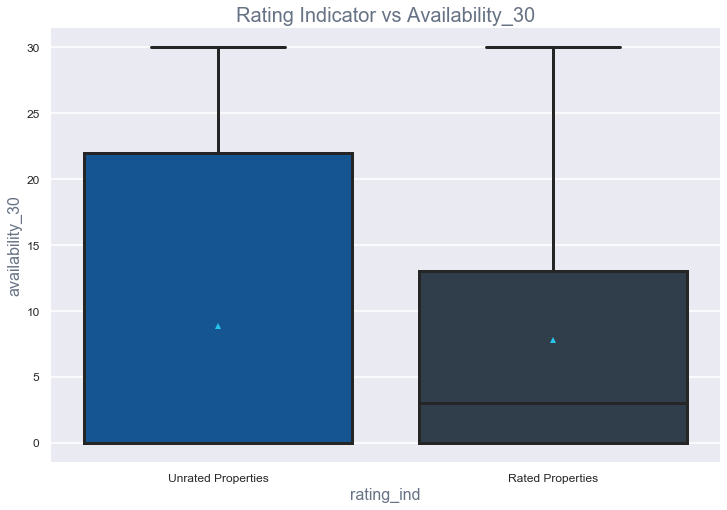

In [39]:
sns.boxplot(x=byArr['rating_ind'], y=byArr['availability_30'], showmeans=True)
plt.title('Rating Indicator vs Availability_30',fontsize=20 )
plt.xticks([0,1],['Unrated Properties', 'Rated Properties'])
plt.savefig('images/box_rating_avail.png', bbox_inches='tight')
plt.show()


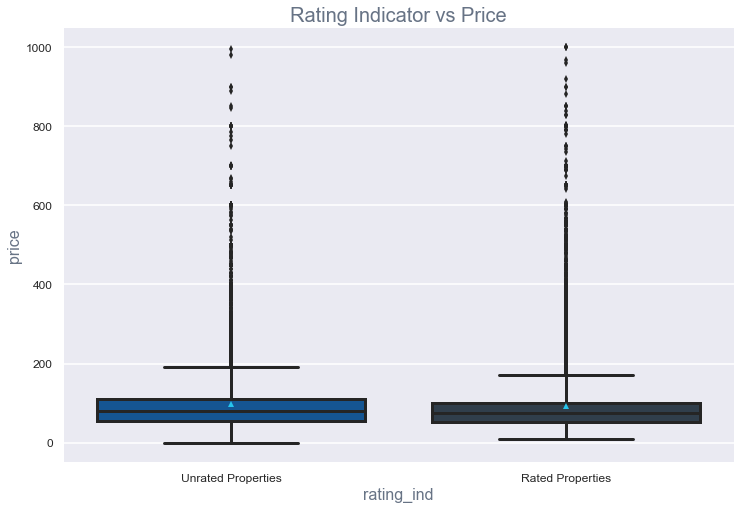

In [40]:
sns.boxplot(x=byArr['rating_ind'], y=byArr['price'], showmeans=True)
plt.title('Rating Indicator vs Price',fontsize=20 )
plt.xticks([0,1],['Unrated Properties', 'Rated Properties'])
plt.savefig('images/box_ratingprice.png', bbox_inches='tight')
plt.show()

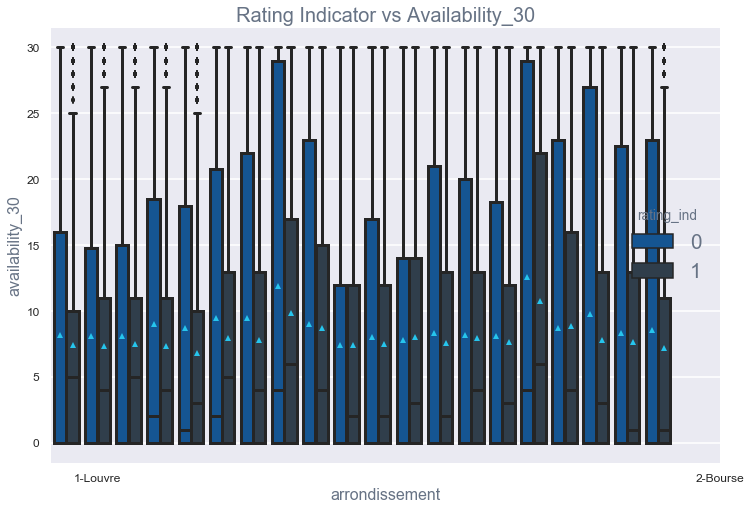

In [36]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(x=byArr['arrondissement'], y=byArr['availability_30'],hue=byArr['rating_ind'], showmeans=True)
plt.title('Rating Indicator vs Availability_30',fontsize=20 )
plt.xticks([x for x in(1,21)],xlabels_text)
plt.savefig('images/box_rating_avail.png', bbox_inches='tight')
plt.show()

In [29]:
dfParis[dfParis.price <= 100].groupby(['rating_ind', 'arrondissement','property_type']).

SyntaxError: invalid syntax (<ipython-input-29-0884c59d75e3>, line 1)

In [14]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf
model = smf.ols(formula= 'price ~ rating_ind', data=byArr)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     85.30
Date:                Thu, 07 Jun 2018   Prob (F-statistic):           2.65e-20
Time:                        09:02:29   Log-Likelihood:            -2.9717e+05
No. Observations:               52295   AIC:                         5.943e+05
Df Residuals:                   52293   BIC:                         5.944e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     98.5865      0.612    161.125      0.0

In [17]:
df_dummies = pd.get_dummies(dfParis['property_type'])
del df_dummies[df_dummies.columns[-1]]
df_new = pd.concat([dfParis, df_dummies], axis=1)
#del df_new['color_head']

In [18]:
df_new.head()

,accommodates,amenities,availability_30,availability_60,availability_90,bathrooms,bedrooms,beds,cancellation_policy,guests_included,...,Hostel,House,Igloo,Loft,Other,Serviced apartment,Timeshare,Tipi,Townhouse,Treehouse
0,4,"TV,Internet,Wireless Internet,Kitchen,Elevator...",0,0,0,1,1.0,2.0,moderate,1,...,0,0,0,0,0,0,0,0,0,0
1,4,"TV,Wireless Internet,Kitchen,Heating,Family/ki...",8,13,32,1,1.0,1.0,strict,1,...,0,0,0,0,0,0,0,0,0,0
2,4,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",9,21,31,1,1.0,1.0,strict,2,...,0,0,0,0,0,0,0,0,0,0
3,2,"TV,Internet,Wireless Internet,Kitchen,Indoor f...",0,0,0,1,1.0,1.0,moderate,1,...,0,0,0,0,0,0,0,0,0,0
4,4,"TV,Wireless Internet,Kitchen,Elevator in build...",10,22,29,1,1.0,1.0,strict,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
x = df_new.values
correlation_matrix = np.corrcoef(x.T)
print(correlation_matrix)

TypeError: must be str, not float

In [93]:
property_median = dfParis.groupby('arrondissement')['price'].median().reset_index()
property_mean = dfParis.groupby('arrondissement')['price'].mean().reset_index()


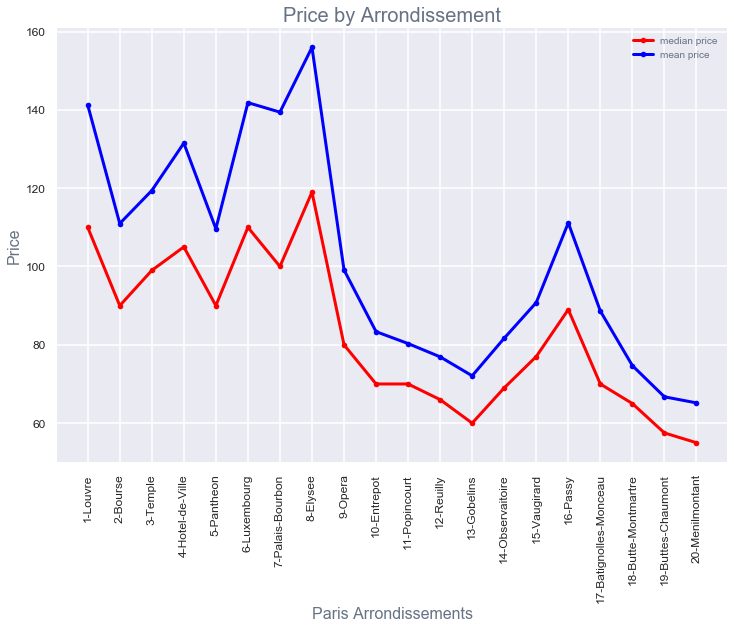

In [98]:
fig = plt.figure(figsize=(12,8))
plt.plot(property_median['arrondissement'], property_median['price'], marker='.', color='red', label='median price')
plt.plot(property_mean['arrondissement'], property_mean['price'], marker='.', color='blue',label='mean price')
plt.xlabel('Paris Arrondissements')
plt.xticks([x for x in range(1,21)],xlabels_text,rotation=90)
plt.ylabel('Price')
plt.title("Price by Arrondissement")
plt.legend(fontsize=10)
plt.savefig('images/line_pricebyArr.png', bbox_inches='tight')
plt.show()

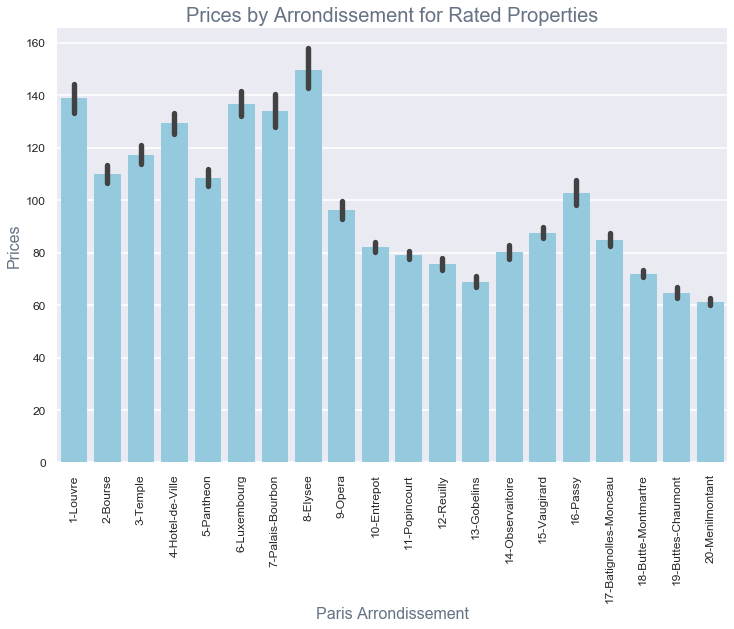

In [68]:
### plot prices by Arrondissement for Rated properties
byArrR = dfParis[dfParis.rating_ind == 1].sort_values(by='arrondissement')
fig = plt.figure(figsize=(12,8))
bar, ax = plt.subplots() 
ax = sns.barplot( x='arrondissement', y='price', data=byArrR, color='skyblue') 
ax.set_title('Prices by Arrondissement for Rated Properties') 
ax.set_xlabel('Paris Arrondissement') 
ax.set_ylabel('Prices') 
ax.set_xticklabels(xlabels_text, rotation=90) 
plt.savefig('images/airbnb_price_byArr_rated.png', bbox_inches='tight')

In [44]:
byArrR[['beds','bedrooms','price']].describe()

,beds,bedrooms,price
count,38775.00000,38702.000000,38803.000000
mean,1.68766,1.041316,92.026106
std,1.05534,0.785073,68.913377
min,1.00000,0.000000,9.000000
25%,1.00000,1.000000,53.000000
50%,1.00000,1.000000,74.000000
75%,2.00000,1.000000,100.000000
max,16.00000,10.000000,999.000000


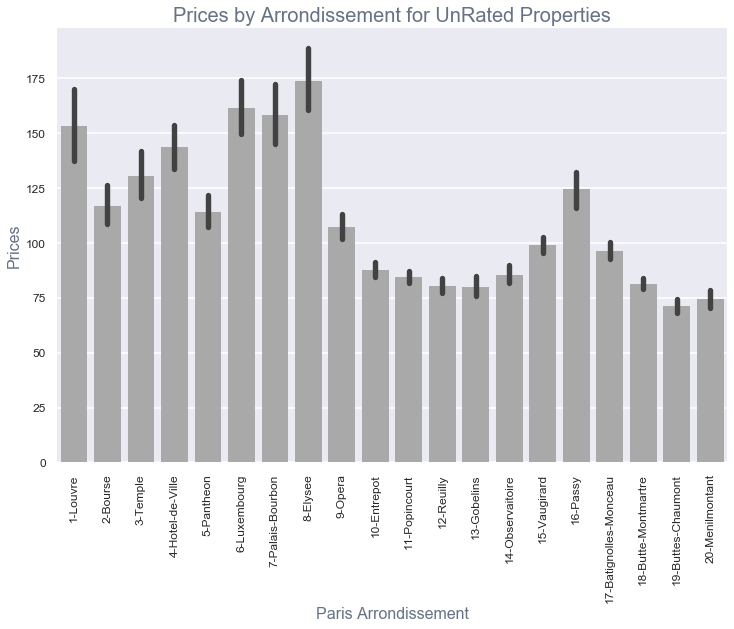

In [28]:
### plot prices by Arrondissement for UnRated properties
byArrU = dfParis[dfParis.rating_ind == 0].sort_values(by='arrondissement')
fig = plt.figure(figsize=(12,8))
bar, ax = plt.subplots() 
ax = sns.barplot( x='arrondissement', y='price', data=byArrU, color='darkgray') 
ax.set_title('Prices by Arrondissement for UnRated Properties') 
ax.set_xlabel('Paris Arrondissement') 
ax.set_ylabel('Prices') 
ax.set_xticklabels(xlabels_text, rotation=90) 
plt.savefig('images/airbnb_price_byArr_rated.png', bbox_inches='tight')

In [46]:
byArrU[['beds','bedrooms','price']].describe()

,beds,bedrooms,price
count,13454.000000,13463.000000,13492.000000
mean,1.634012,1.077026,98.586496
std,0.927454,0.785450,76.939786
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.000000
50%,1.000000,1.000000,79.000000
75%,2.000000,1.000000,110.000000
max,16.000000,6.000000,995.000000


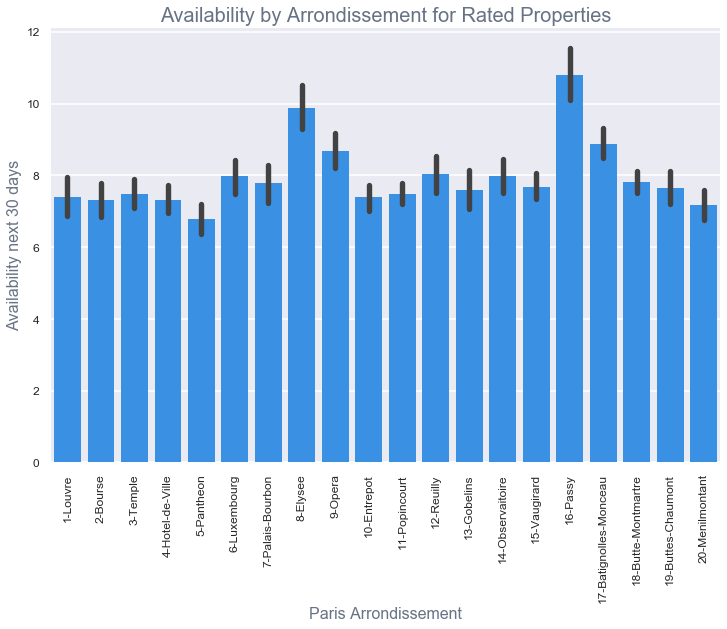

In [29]:
fig = plt.figure(figsize=(8,4))
bar, ax = plt.subplots() 
ax = sns.barplot( x='arrondissement', y='availability_30', data=byArrR, color='dodgerblue') 
ax.set_title('Availability by Arrondissement for Rated Properties') 
ax.set_xlabel('Paris Arrondissement') 
ax.set_ylabel('Availability next 30 days') 
ax.set_xticklabels(xlabels_text, rotation=90) 
plt.savefig('images/airbnb_avail_byArrR.png', bbox_inches='tight')

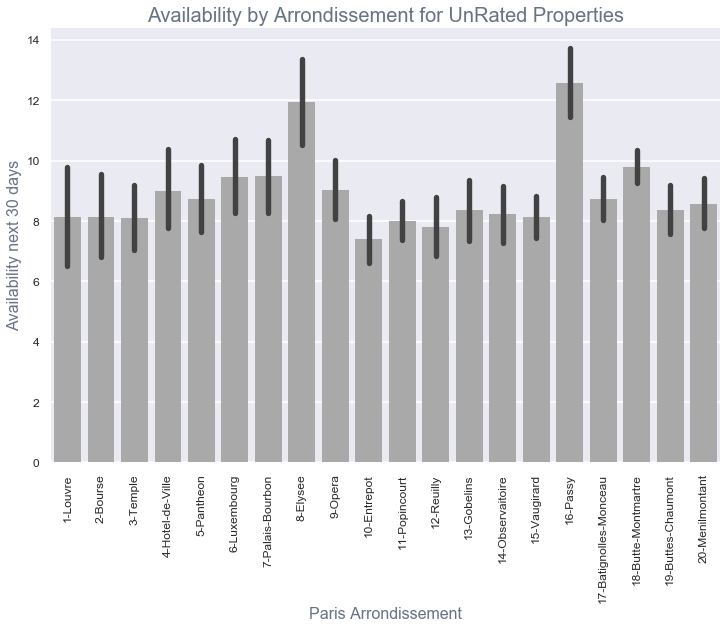

In [30]:
fig = plt.figure(figsize=(8,4))
bar, ax = plt.subplots() 
ax = sns.barplot( x='arrondissement', y='availability_30', data=byArrU, color='darkgrey') 
ax.set_title('Availability by Arrondissement for UnRated Properties') 
ax.set_xlabel('Paris Arrondissement') 
ax.set_ylabel('Availability next 30 days') 
ax.set_xticklabels(xlabels_text, rotation=90) 
plt.savefig('images/airbnb_avail_byArrU.png', bbox_inches='tight')

In [18]:
byArr.availability_30.describe()

count    52295.000000
mean         8.086509
std         10.562247
min          0.000000
25%          0.000000
50%          3.000000
75%         14.000000
max         30.000000
Name: availability_30, dtype: float64

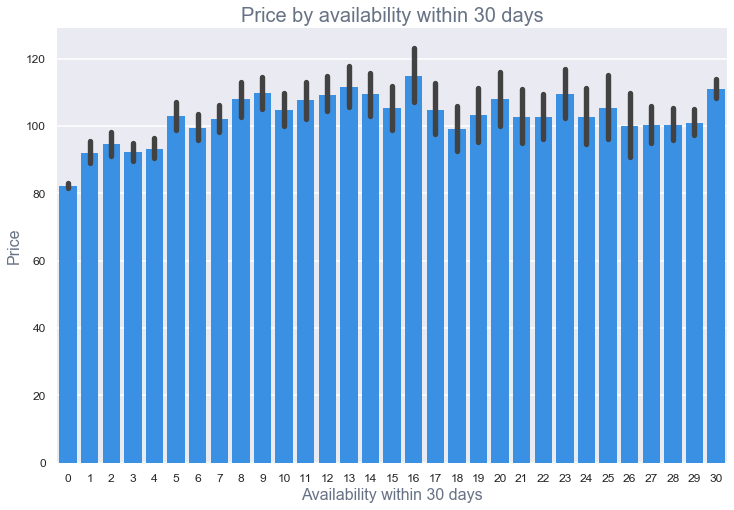

In [99]:
fig = plt.figure(figsize=(12,10))
bar, ax = plt.subplots() 
ax = sns.barplot( x='availability_30', y='price', data=byArr, color='dodgerblue') 
ax.set_title('Price by availability within 30 days') 
ax.set_xlabel('Availability within 30 days') 
ax.set_ylabel('Price') 
#ax.set_xticklabels(labels=byArr['arrondissement'].unique()) 
plt.savefig('images/airbnb_price_byAvail.png', bbox_inches='tight')

In [31]:
dfParis.columns

Index(['accommodates', 'amenities', 'availability_30', 'availability_60',
       'availability_90', 'bathrooms', 'bedrooms', 'beds',
       'cancellation_policy', 'guests_included', 'host_since',
       'host_total_listings_count', 'id', 'last_review', 'latitude',
       'longitude', 'minimum_nights', 'neighbourhood_cleansed',
       'number_of_reviews', 'price', 'property_type', 'review_scores_accuracy',
       'review_scores_checkin', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'reviews_per_month',
       'room_type', 'summary', 'transit', 'zipcode', 'arrondissement',
       'arrond_name', 'rating_ind', '_merge', 'price_norm', 'Eiffel Tower',
       'The Louvre', 'Jardin du Luxembourg', 'Le Marais', 'Musee d'Orsay',
       'Sainte-Chapelle', 'Palais Garnier - Opera', 'Notre Dame Cathedral',
       'Musee de l'Orangerie', 'Pont Alexandre III', 'closest_attraction',
       'attraction

In [21]:
len(dfParis)

52295

In [34]:
dfParis['close_to_attraction'].value_counts()

1.0    51131
0.0     1164
Name: close_to_attraction, dtype: int64

In [33]:
dfParis.groupby(['close_to_attraction','closest_attraction']).agg({'attraction_dist':'mean'}).reset_index()

,close_to_attraction,closest_attraction,attraction_dist
0,0.0,Eiffel Tower,2.564237
1,0.0,Le Marais,2.150082
2,1.0,Eiffel Tower,0.438370
3,1.0,Jardin du Luxembourg,0.059647
4,1.0,Le Marais,0.738323
5,1.0,Musee d'Orsay,0.051055
6,1.0,Musee de l'Orangerie,0.084018
7,1.0,Notre Dame Cathedral,0.081818
8,1.0,Palais Garnier - Opera,0.062057
9,1.0,Pont Alexandre III,0.196415


In [32]:
dfParis[['Eiffel Tower',
       'The Louvre', 'Jardin du Luxembourg', 'Le Marais', "Musee d'Orsay",
       'Sainte-Chapelle', 'Palais Garnier - Opera', 'Notre Dame Cathedral',
       "Musee de l'Orangerie", 'Pont Alexandre III',
       'attraction_dist']].describe()

,Eiffel Tower,The Louvre,Jardin du Luxembourg,Le Marais,Musee d'Orsay,Sainte-Chapelle,Palais Garnier - Opera,Notre Dame Cathedral,Musee de l'Orangerie,Pont Alexandre III,attraction_dist
count,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000
mean,2.451610,1.241827,1.247554,1.225713,1.442652,1.169955,1.339511,1.160567,1.536012,1.793969,0.434459
std,1.306811,0.864859,0.865718,0.966888,0.929800,0.872839,0.889302,0.895895,0.968874,1.070821,0.553964
min,0.000120,0.000019,0.000005,0.000120,0.000049,0.000006,0.000142,0.000008,0.000092,0.000060,0.000005
25%,1.470875,0.510602,0.517299,0.483573,0.712139,0.420950,0.602452,0.410087,0.791893,0.930134,0.064844
50%,2.466421,1.081774,1.091516,0.977231,1.297222,1.003495,1.204033,1.003477,1.373406,1.659782,0.152273
75%,3.458353,1.878876,1.884517,1.742339,2.118919,1.779276,1.972943,1.741088,2.257112,2.593160,0.655641
max,7.464953,5.504796,5.523780,5.818095,6.005062,5.190959,5.776991,5.413835,6.182183,6.595990,4.540802


In [62]:
dfParis.groupby(['arrondissement','arrond_name', 'close_to_attraction','closest_attraction']).agg({'attraction_dist':'mean'}).reset_index()

,arrondissement,arrond_name,close_to_attraction,closest_attraction,attraction_dist
0,1,Louvre,1.0,Jardin du Luxembourg,0.064910
1,1,Louvre,1.0,Le Marais,0.092877
2,1,Louvre,1.0,Musee d'Orsay,0.052039
3,1,Louvre,1.0,Musee de l'Orangerie,0.060120
4,1,Louvre,1.0,Notre Dame Cathedral,0.059378
5,1,Louvre,1.0,Palais Garnier - Opera,0.057162
6,1,Louvre,1.0,Sainte-Chapelle,0.076090
7,1,Louvre,1.0,The Louvre,0.102914
8,2,Bourse,1.0,Jardin du Luxembourg,0.057923
9,2,Bourse,1.0,Le Marais,0.176477


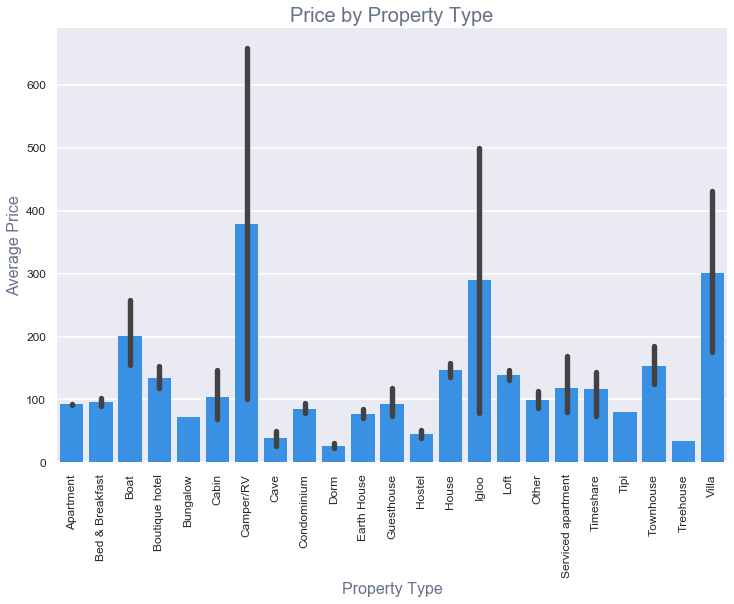

In [192]:
by_ptype = dfParis.sort_values(by='property_type')

fig = plt.figure(figsize=(12,10))
bar, ax = plt.subplots() 
ax = sns.barplot( x='property_type', y='price', data=by_ptype, color='dodgerblue') 
ax.set_title('Price by Property Type') 
ax.set_xlabel('Property Type') 
ax.set_ylabel('Average Price') 
ax.set_xticklabels(labels=by_ptype['property_type'].unique(), rotation=90) 
plt.savefig('images/airbnb_price_byPtype.png', bbox_inches='tight')

In [183]:
temp = dfParis.groupby('property_type').id.count()/dfParis.groupby('property_type').id.count().sum()*100

In [184]:
temp.reset_index()
temp = pd.DataFrame(temp)
temp.reset_index()

,property_type,id
0,Apartment,95.573191
1,Bed & Breakfast,0.720910
2,Boat,0.055455
3,Boutique hotel,0.206521
4,Bungalow,0.003824
5,Cabin,0.024859
6,Camper/RV,0.003824
7,Cave,0.003824
8,Condominium,0.455110
9,Dorm,0.118558


In [186]:
temp['median_price']= dfParis.groupby('property_type').price.median()

In [188]:
temp.reset_index()

,property_type,id,median_price
0,Apartment,95.573191,75.0
1,Bed & Breakfast,0.720910,79.0
2,Boat,0.055455,170.0
3,Boutique hotel,0.206521,115.0
4,Bungalow,0.003824,72.0
5,Cabin,0.024859,64.0
6,Camper/RV,0.003824,379.0
7,Cave,0.003824,38.0
8,Condominium,0.455110,69.0
9,Dorm,0.118558,20.5


In [189]:
temp.rename(columns={'id': 'pct_count'}, inplace=True)

In [191]:
temp.reset_index()

,property_type,pct_count,median_price
0,Apartment,95.573191,75.0
1,Bed & Breakfast,0.720910,79.0
2,Boat,0.055455,170.0
3,Boutique hotel,0.206521,115.0
4,Bungalow,0.003824,72.0
5,Cabin,0.024859,64.0
6,Camper/RV,0.003824,379.0
7,Cave,0.003824,38.0
8,Condominium,0.455110,69.0
9,Dorm,0.118558,20.5


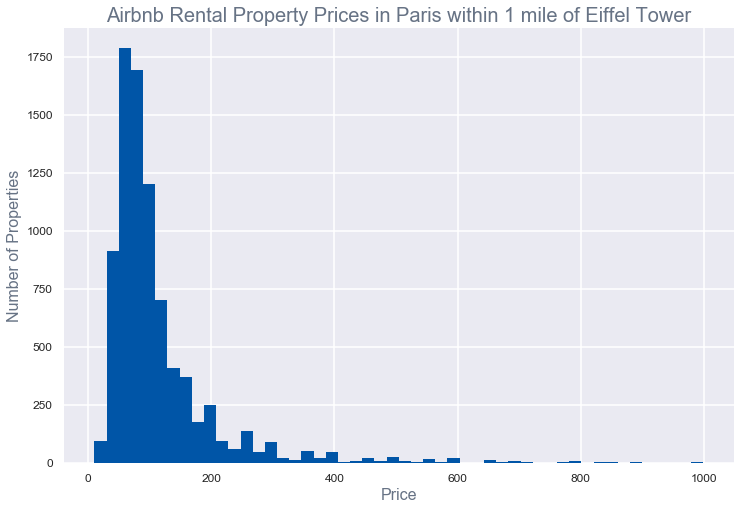

In [23]:
### Explore prices of properties within 1 mile of the top attractions:
temp = dfParis[dfParis['Eiffel Tower'] <= 1.0]
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(temp.price,bins=50)
ax.set_xlabel('Price')
ax.set_ylabel('Number of Properties')
ax.set_title('Airbnb Rental Property Prices in Paris within 1 mile of Eiffel Tower')
plt.show()

In [24]:
temp.price.describe()

count    8300.000000
mean      109.109157
std        88.986314
min        10.000000
25%        60.000000
50%        84.000000
75%       120.000000
max       999.000000
Name: price, dtype: float64

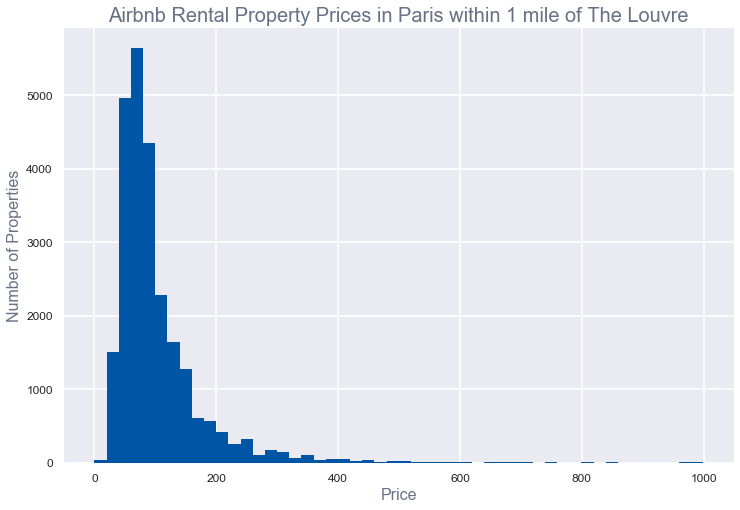

In [25]:
temp = dfParis[dfParis['The Louvre'] <= 1.0]
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(temp.price,bins=50)
ax.set_xlabel('Price')
ax.set_ylabel('Number of Properties')
ax.set_title('Airbnb Rental Property Prices in Paris within 1 mile of The Louvre')
plt.show()

In [26]:
temp.price.describe()

count    24774.000000
mean        99.267498
std         72.796197
min          0.000000
25%         58.000000
50%         80.000000
75%        115.000000
max        999.000000
Name: price, dtype: float64

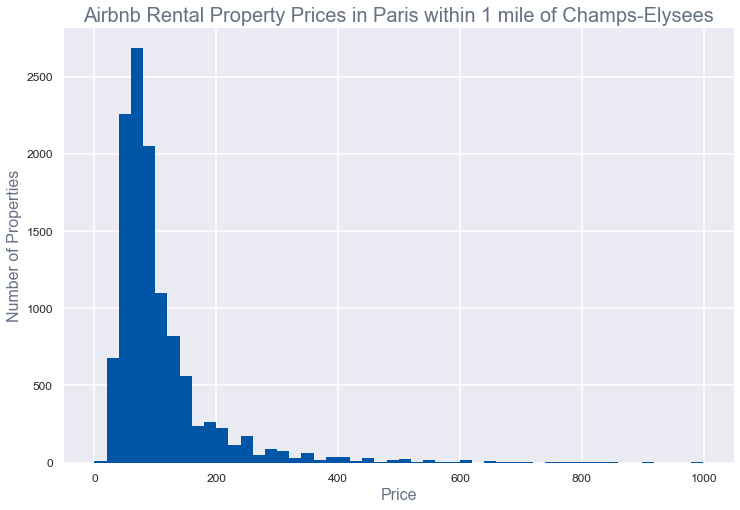

In [27]:
### Explore prices of properties within 1 mile of the top attractions:
temp = dfParis[dfParis['Champs-Elysees'] <= 1.0]
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(temp.price,bins=50)
ax.set_xlabel('Price')
ax.set_ylabel('Number of Properties')
ax.set_title('Airbnb Rental Property Prices in Paris within 1 mile of Champs-Elysees')
plt.show()

In [28]:
temp.price.describe()

count    11739.000000
mean       104.452849
std         85.598339
min          0.000000
25%         59.000000
50%         80.000000
75%        120.000000
max        999.000000
Name: price, dtype: float64

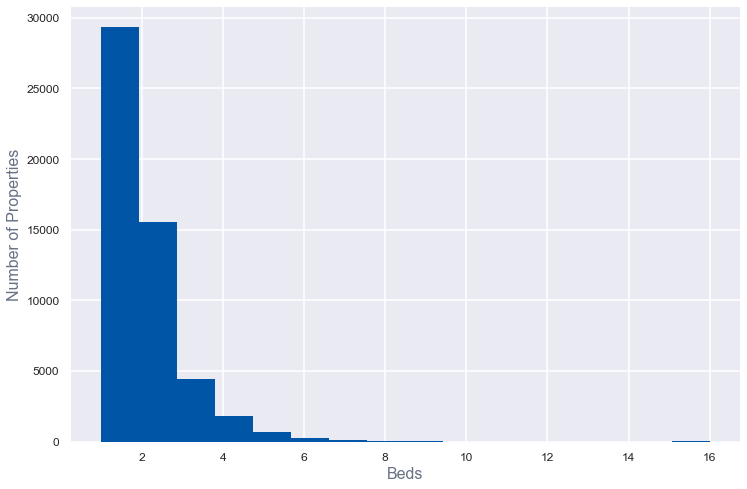

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(dfParis.beds.dropna(),bins=16)
ax.set_xlabel('Beds')
ax.set_ylabel('Number of Properties')
plt.show()

In [47]:
features = dfParis[dfParis.review_scores_rating > 0][['accommodates', 'availability_30', 'bathrooms', 'bedrooms',
       'beds', 'price', 'review_scores_accuracy',
       'review_scores_checkin', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'reviews_per_month','arrondissement', 'Eiffel Tower',
       'The Louvre', 'Jardin du Luxembourg', 'Le Marais', "Musee d'Orsay",
       'Sainte-Chapelle', 'Palais Garnier - Opera', 'Notre Dame Cathedral',
       "Musee de l'Orangerie", 'Pont Alexandre III',
       'attraction_dist','close_to_attraction']]

In [48]:
features['reviews_per_month'] = features[['reviews_per_month']].apply(pd.to_numeric) 

In [49]:
features = features[pd.notnull(features.availability_30)]
features = features[pd.notnull(features.beds)]
features = features[pd.notnull(features.bedrooms)]
features = features[pd.notnull(features.bathrooms)]

In [50]:
features1 = features[['availability_30','accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price']]

In [51]:
len(features1)

38578

In [52]:
features1 = features1[pd.notnull(features1.availability_30)]

In [53]:
features1['accommodates'].isnull().sum()

0

In [54]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38578 entries, 0 to 52337
Data columns (total 27 columns):
accommodates                   38578 non-null int64
availability_30                38578 non-null int64
bathrooms                      38578 non-null object
bedrooms                       38578 non-null float64
beds                           38578 non-null float64
price                          38578 non-null float64
review_scores_accuracy         38460 non-null float64
review_scores_checkin          38442 non-null float64
review_scores_cleanliness      38485 non-null float64
review_scores_communication    38480 non-null float64
review_scores_location         38449 non-null float64
review_scores_rating           38578 non-null float64
review_scores_value            38443 non-null float64
reviews_per_month              38578 non-null float64
arrondissement                 38578 non-null int64
Eiffel Tower                   38578 non-null float64
The Louvre                     385

### Plot correlation of other variables with the property price

In [64]:
recent_corr = features.corr().loc['price'].drop(['price'])

In [65]:
def conditional_bar(series, bar_colors=None, color_labels=None, figsize=(8,10),
                   xlabel=None, by=None, ylabel=None, title=None):
    fig, ax  = plt.subplots(figsize=figsize)
    if not bar_colors:
        bar_colors = mpl.rcParams['axes.prop_cycle'].by_key()['color'][0]
    plt.barh(range(len(series)),series.values, color=bar_colors)
    plt.xlabel('' if not xlabel else xlabel);
    plt.ylabel('' if not ylabel else ylabel)
    plt.yticks(range(len(series)), series.index.tolist())
    plt.title('' if not title else title);
    plt.ylim([-1,len(series)]);
    if color_labels:
        for col, lab in color_labels.items():
            plt.plot([], linestyle='',marker='s',c=col, label= lab);
        lines, labels = ax.get_legend_handles_labels();
        ax.legend(lines[-len(color_labels.keys()):], labels[-len(color_labels.keys()):], loc='upper right');
    plt.close()
    fig.savefig('images/features_corr.png', bbox_inches='tight')
    return fig

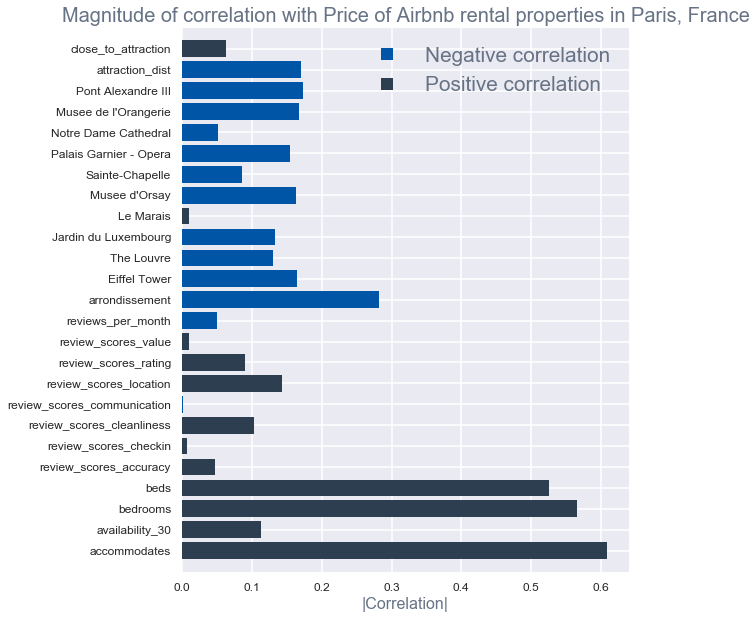

In [66]:
bar_colors = ['#0055A7' if x else '#2C3E4F' for x in list(recent_corr.values < 0)]
color_labels = {'#0055A7':'Negative correlation', '#2C3E4F':'Positive correlation'}

conditional_bar(recent_corr.apply(np.abs), bar_colors, color_labels,
               title='Magnitude of correlation with Price of Airbnb rental properties in Paris, France',
               xlabel='|Correlation|')

In [58]:
recent_corr

accommodates                   0.609502
availability_30                0.113535
bedrooms                       0.565827
beds                           0.525747
review_scores_accuracy         0.046210
review_scores_checkin          0.007467
review_scores_cleanliness      0.103459
review_scores_communication   -0.001135
review_scores_location         0.142896
review_scores_rating           0.089324
review_scores_value            0.009826
reviews_per_month             -0.049964
arrondissement                -0.281320
Eiffel Tower                  -0.164609
The Louvre                    -0.130318
Jardin du Luxembourg          -0.132288
Le Marais                      0.009780
Musee d'Orsay                 -0.163015
Sainte-Chapelle               -0.085040
Palais Garnier - Opera        -0.153818
Notre Dame Cathedral          -0.051087
Musee de l'Orangerie          -0.166999
Pont Alexandre III            -0.173533
attraction_dist               -0.169561
close_to_attraction            0.062816


In [59]:
features.columns

Index(['accommodates', 'availability_30', 'bathrooms', 'bedrooms', 'beds',
       'price', 'review_scores_accuracy', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating', 'review_scores_value',
       'reviews_per_month', 'arrondissement', 'Eiffel Tower', 'The Louvre',
       'Jardin du Luxembourg', 'Le Marais', 'Musee d'Orsay', 'Sainte-Chapelle',
       'Palais Garnier - Opera', 'Notre Dame Cathedral',
       'Musee de l'Orangerie', 'Pont Alexandre III', 'attraction_dist',
       'close_to_attraction'],
      dtype='object')

In [60]:
features.isnull().sum()

accommodates                     0
availability_30                  0
bathrooms                        0
bedrooms                         0
beds                             0
price                            0
review_scores_accuracy         118
review_scores_checkin          136
review_scores_cleanliness       93
review_scores_communication     98
review_scores_location         129
review_scores_rating             0
review_scores_value            135
reviews_per_month                0
arrondissement                   0
Eiffel Tower                     0
The Louvre                       0
Jardin du Luxembourg             0
Le Marais                        0
Musee d'Orsay                    0
Sainte-Chapelle                  0
Palais Garnier - Opera           0
Notre Dame Cathedral             0
Musee de l'Orangerie             0
Pont Alexandre III               0
attraction_dist                  0
close_to_attraction              0
dtype: int64

In [47]:
features2 = features.drop(['review_scores_accuracy','review_scores_checkin','review_scores_cleanliness','review_scores_communication',
                           'review_scores_location','review_scores_value'], axis=1)

In [48]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(features2)
df_normalized = pd.DataFrame(np_scaled)
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.000000,0.125,0.1,0.066667,0.203030,1.0000,0.039466,0.315789,0.053312,0.340110,0.030962,0.264318,0.271144,0.337625,0.396103,0.137236,0.449415
1,0.266667,0.125,0.1,0.000000,0.142424,0.7500,0.017232,0.736842,0.027483,0.370863,0.059095,0.298598,0.305107,0.368494,0.424251,0.168275,0.475082
2,0.300000,0.125,0.1,0.000000,0.172727,0.9500,0.154530,0.315789,0.270111,0.082111,0.205111,0.023286,0.013731,0.078655,0.159993,0.123180,0.234145
3,0.333333,0.125,0.1,0.000000,0.122222,0.9625,0.034464,0.315789,0.083057,0.304702,0.001392,0.224847,0.232039,0.302084,0.363697,0.101495,0.419867
4,0.000000,0.125,0.1,0.000000,0.041414,0.9125,0.084491,0.315789,0.094222,0.291441,0.013546,0.210056,0.217386,0.288773,0.351567,0.088094,0.408814


In [49]:
import scipy.stats 

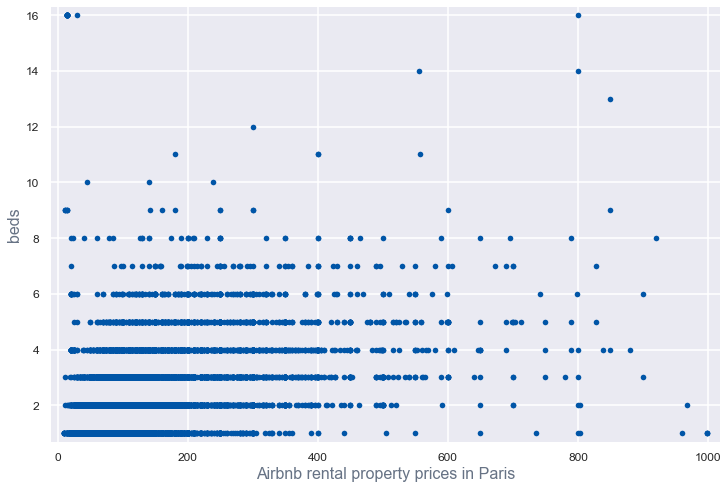

In [50]:
_ = plt.plot(features['price'], features['beds'], marker = '.', linestyle='none')
plt.margins(.02)
_ = plt.xlabel('Airbnb rental property prices in Paris')
_ = plt.ylabel('beds')

plt.show()

In [51]:
print(scipy.stats.pearsonr(features['price'], features['beds']))

(0.52574670819836089, 0.0)


In [111]:
#total_all = dfParis.groupby('arrondissement').agg({'id':'count'}).reset_index()
total_by_arr = dfParis.groupby('arrondissement').agg({'id':'count'}).reset_index()
total_Avail_by_arr = dfParis[(dfParis.price <= 100) & (dfParis.availability_30 >= 5)].groupby('arrondissement').agg({'id':'count'}).reset_index()
total_Avail_by_arr200 = dfParis[(dfParis.price <= 200) & (dfParis.availability_30 >= 5)].groupby('arrondissement').agg({'id':'count'}).reset_index()
total_Avail_by_arr400 = dfParis[(dfParis.price <= 400) & (dfParis.availability_30 >= 5)].groupby('arrondissement').agg({'id':'count'}).reset_index()

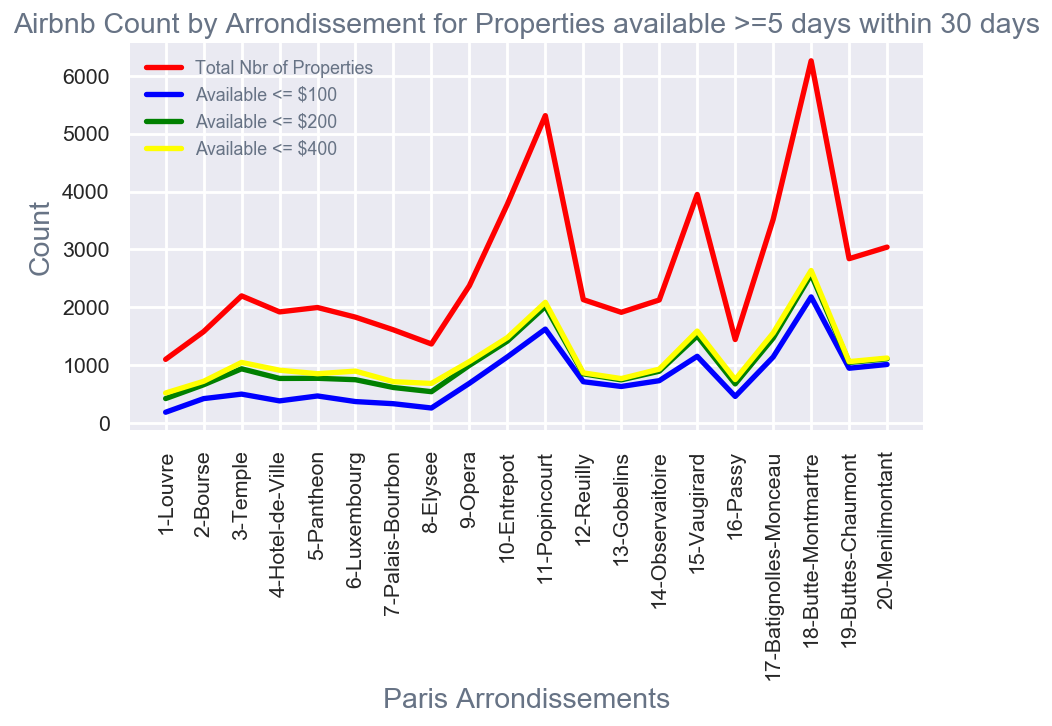

In [112]:
fig = plt.figure(dpi = 128, figsize=(8,4))
#plt.plot(total_all['arrondissement'],total_all['id'], c='black',label="Total Nbr of Properties")
plt.plot(total_by_arr['arrondissement'],total_by_arr['id'], c='red',label="Total Nbr of Properties")
plt.plot(total_Avail_by_arr['arrondissement'],total_Avail_by_arr['id'], c='blue',label="Available <= $100")
plt.plot(total_Avail_by_arr200['arrondissement'],total_Avail_by_arr200['id'], c='green',label="Available <= $200")
plt.plot(total_Avail_by_arr400['arrondissement'],total_Avail_by_arr400['id'], c='yellow',label="Available <= $400")
plt.title("Airbnb Count by Arrondissement for Properties available >=5 days within 30 days", fontsize=16)
plt.xlabel("Paris Arrondissements")
plt.ylabel("Count")
plt.xticks([x for x in range(1,21)],xlabels_text,rotation=90)
plt.legend(fontsize=10)
plt.savefig('images/Avail_less100.png',bbox_inches='tight')
plt.show()

In [113]:
total_by_arr = dfParis[dfParis.price <= 400].groupby('arrondissement').agg({'id':'count'}).reset_index()
total_Avail_by_arr = dfParis[(dfParis.price <= 100) & (dfParis.availability_60 >= 5)].groupby('arrondissement').agg({'id':'count'}).reset_index()
total_Avail_by_arr200 = dfParis[(dfParis.price <= 200) & (dfParis.availability_60 >= 5)].groupby('arrondissement').agg({'id':'count'}).reset_index()
total_Avail_by_arr400 = dfParis[(dfParis.price <= 400) & (dfParis.availability_60 >= 5)].groupby('arrondissement').agg({'id':'count'}).reset_index()

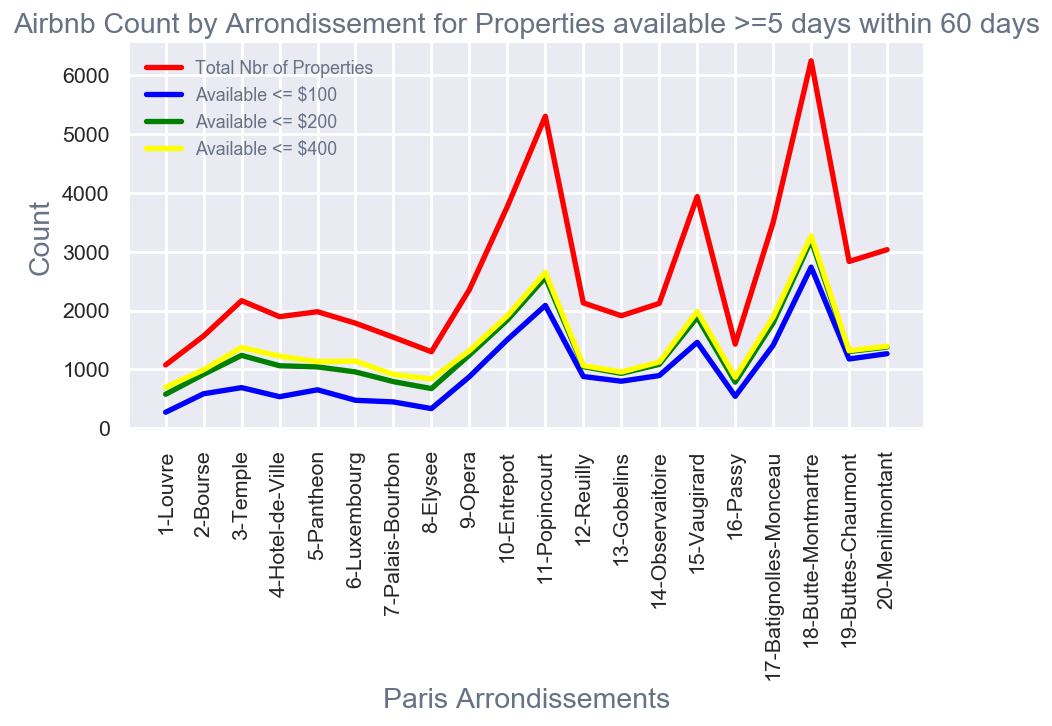

In [114]:
fig = plt.figure(dpi = 128, figsize=(8,4))
#plt.plot(total_all['arrondissement'],total_all['id'], c='black',label="Total Nbr of Properties")
plt.plot(total_by_arr['arrondissement'],total_by_arr['id'], c='red',label="Total Nbr of Properties")
plt.plot(total_Avail_by_arr['arrondissement'],total_Avail_by_arr['id'], c='blue',label="Available <= $100")
plt.plot(total_Avail_by_arr200['arrondissement'],total_Avail_by_arr200['id'], c='green',label="Available <= $200")
plt.plot(total_Avail_by_arr400['arrondissement'],total_Avail_by_arr400['id'], c='yellow',label="Available <= $400")
plt.title("Airbnb Count by Arrondissement for Properties available >=5 days within 60 days", fontsize=16)
plt.xlabel("Paris Arrondissements")
plt.ylabel("Count")
plt.xticks([x for x in range(1,21)],xlabels_text,rotation=90)
plt.legend(fontsize=10)
plt.savefig('images/Avail_less100_60days.png',bbox_inches='tight')
plt.show()

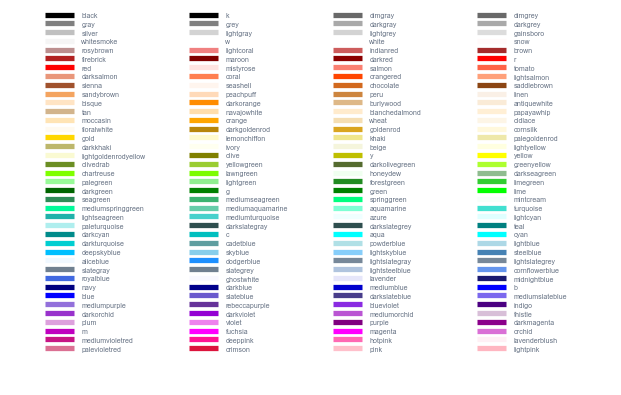

In [115]:
from __future__ import division

import matplotlib.pyplot as plt
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]

n = len(sorted_names)
ncols = 4
nrows = n // ncols + 1

fig, ax = plt.subplots(figsize=(8, 5))

# Get height and width
X, Y = fig.get_dpi() * fig.get_size_inches()
h = Y / (nrows + 1)
w = X / ncols

for i, name in enumerate(sorted_names):
    col = i % ncols
    row = i // ncols
    y = Y - (row * h) - h

    xi_line = w * (col + 0.05)
    xf_line = w * (col + 0.25)
    xi_text = w * (col + 0.3)

    ax.text(xi_text, y, name, fontsize=(h * 0.8),
            horizontalalignment='left',
            verticalalignment='center')

    ax.hlines(y + h * 0.1, xi_line, xf_line,
              color=colors[name], linewidth=(h * 0.6))

ax.set_xlim(0, X)
ax.set_ylim(0, Y)
ax.set_axis_off()

fig.subplots_adjust(left=0, right=1,
                    top=1, bottom=0,
                    hspace=0, wspace=0)
plt.show()

In [132]:
len(sorted_names)

156

In [133]:
colors = sorted_names[70:90]
colors

['darkolivegreen',
 'greenyellow',
 'chartreuse',
 'lawngreen',
 'honeydew',
 'darkseagreen',
 'palegreen',
 'lightgreen',
 'forestgreen',
 'limegreen',
 'darkgreen',
 'g',
 'green',
 'lime',
 'seagreen',
 'mediumseagreen',
 'springgreen',
 'mintcream',
 'mediumspringgreen',
 'mediumaquamarine']

In [138]:
ylabels = [x for x in range(31)]
ylabels

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

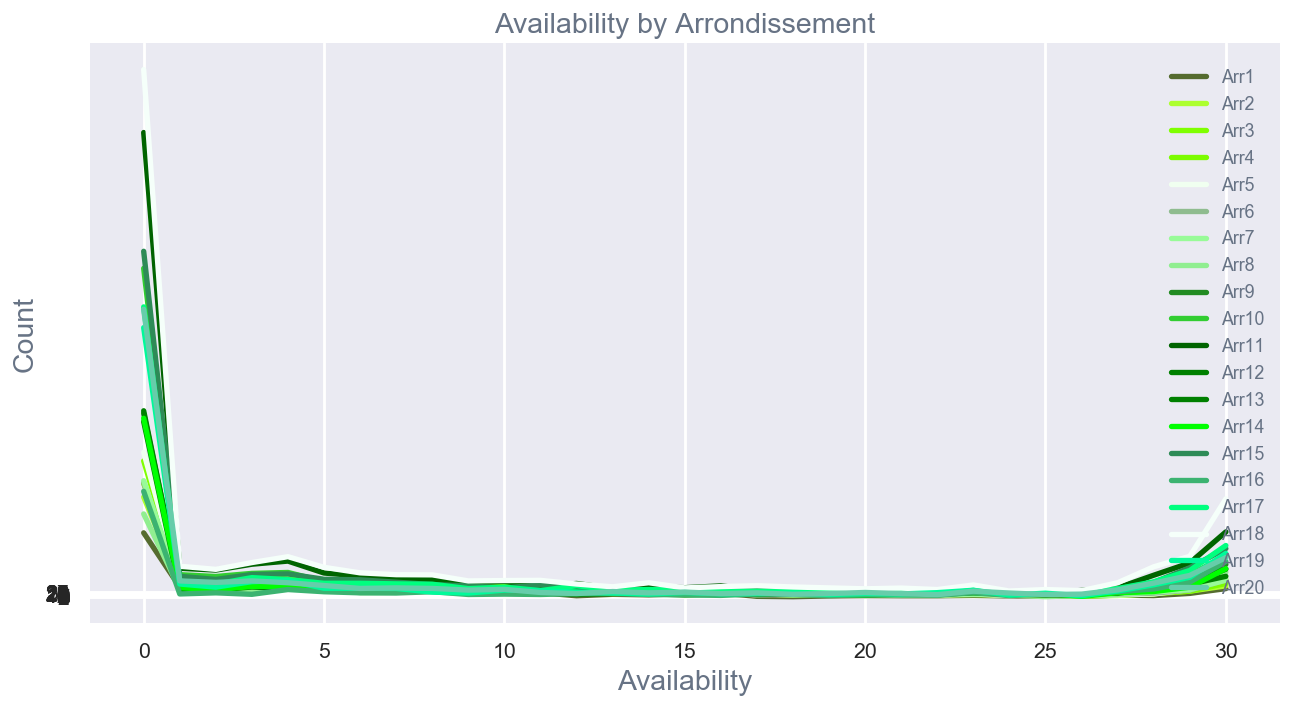

In [148]:
fig = plt.figure(dpi = 128, figsize=(12,6))

for x in range(20):
    arr_num = x + 1
    df = dfParis[dfParis['arrondissement'] == arr_num].groupby('availability_30')['id'].count().reset_index()
    plt.plot(df['availability_30'], df['id'],color=colors[x], label="Arr{}".format(x+1) )
    
plt.title("Availability by Arrondissement", fontsize=16)
plt.xlabel("Availability")
plt.ylabel("Count")
#plt.xticks([x for x in range(1,21)],xlabels_text,rotation=90)
plt.yticks(ylabels)
plt.legend(fontsize=10,loc=5)
#plt.savefig('images/Avail_less100_60days.png',bbox_inches='tight')
plt.show()